In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
import tensorflow as tf

In [3]:
# Create a place to store our images
x = tf.placeholder(tf.float32, [None, 784])

# Create the weights and biases variables
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# Create the model!
y = tf.nn.softmax(tf.matmul(x, W) + b)

# Create a structure to store our labels
y_ = tf.placeholder(tf.float32, [None, 10])

# Create objective or cost function
cross_entropy = tf.reduce_mean(
    -tf.reduce_sum(y_ * tf.log(y), 
                   reduction_indices=[1])
)

# This is a more numerically stable way?
# cross_entropy_stable =\
#     tf.nn.softmax_cross_entropy_with_logits(tf.matmul(x, W) + b)

# Define how to train the model
train_step =\
    tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
# train_step_stable =\
#     tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy_stable)
    
# Create an interactive session
sess = tf.InteractiveSession()

# Initalize defined variables and placeholders
tf.global_variables_initializer().run()

# Train the model?
for _ in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    
# Check if our model can predict values acurately
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

# Find percentage of correct predictions
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Print the accuracy out
print(sess.run(accuracy, feed_dict={
    x: mnist.test.images,
    y_: mnist.test.labels
}))

0.9192


(10, 28, 28)


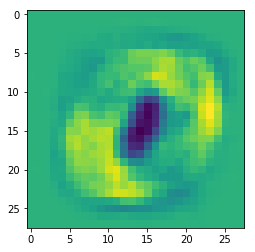

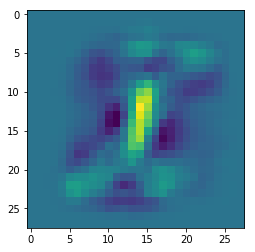

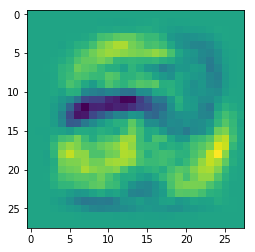

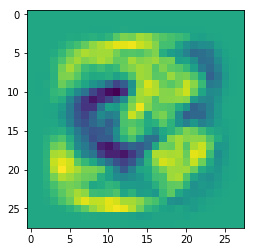

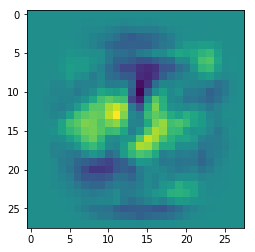

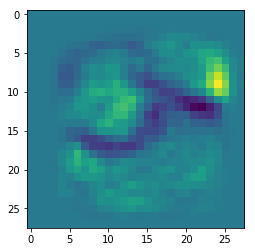

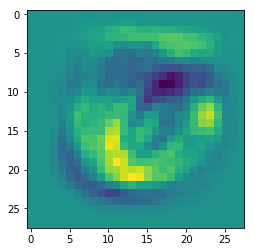

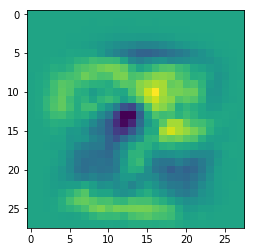

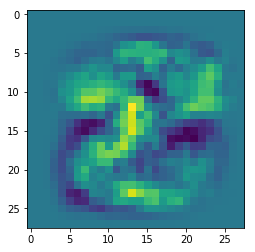

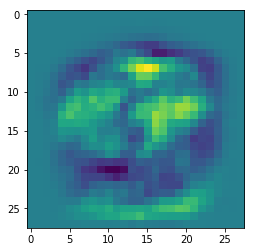

In [16]:
numpy_w = W.eval().T.reshape((10, 28, -1))
print(numpy_w.shape)

import matplotlib.pyplot as plt
import numpy as np

for i in np.arange(10):
    plt.imshow(numpy_w[i], cmap=plt.cm.viridis)
    plt.show()